# Using Chat GPT to Analyse Excel Data - Building a Streamlit App

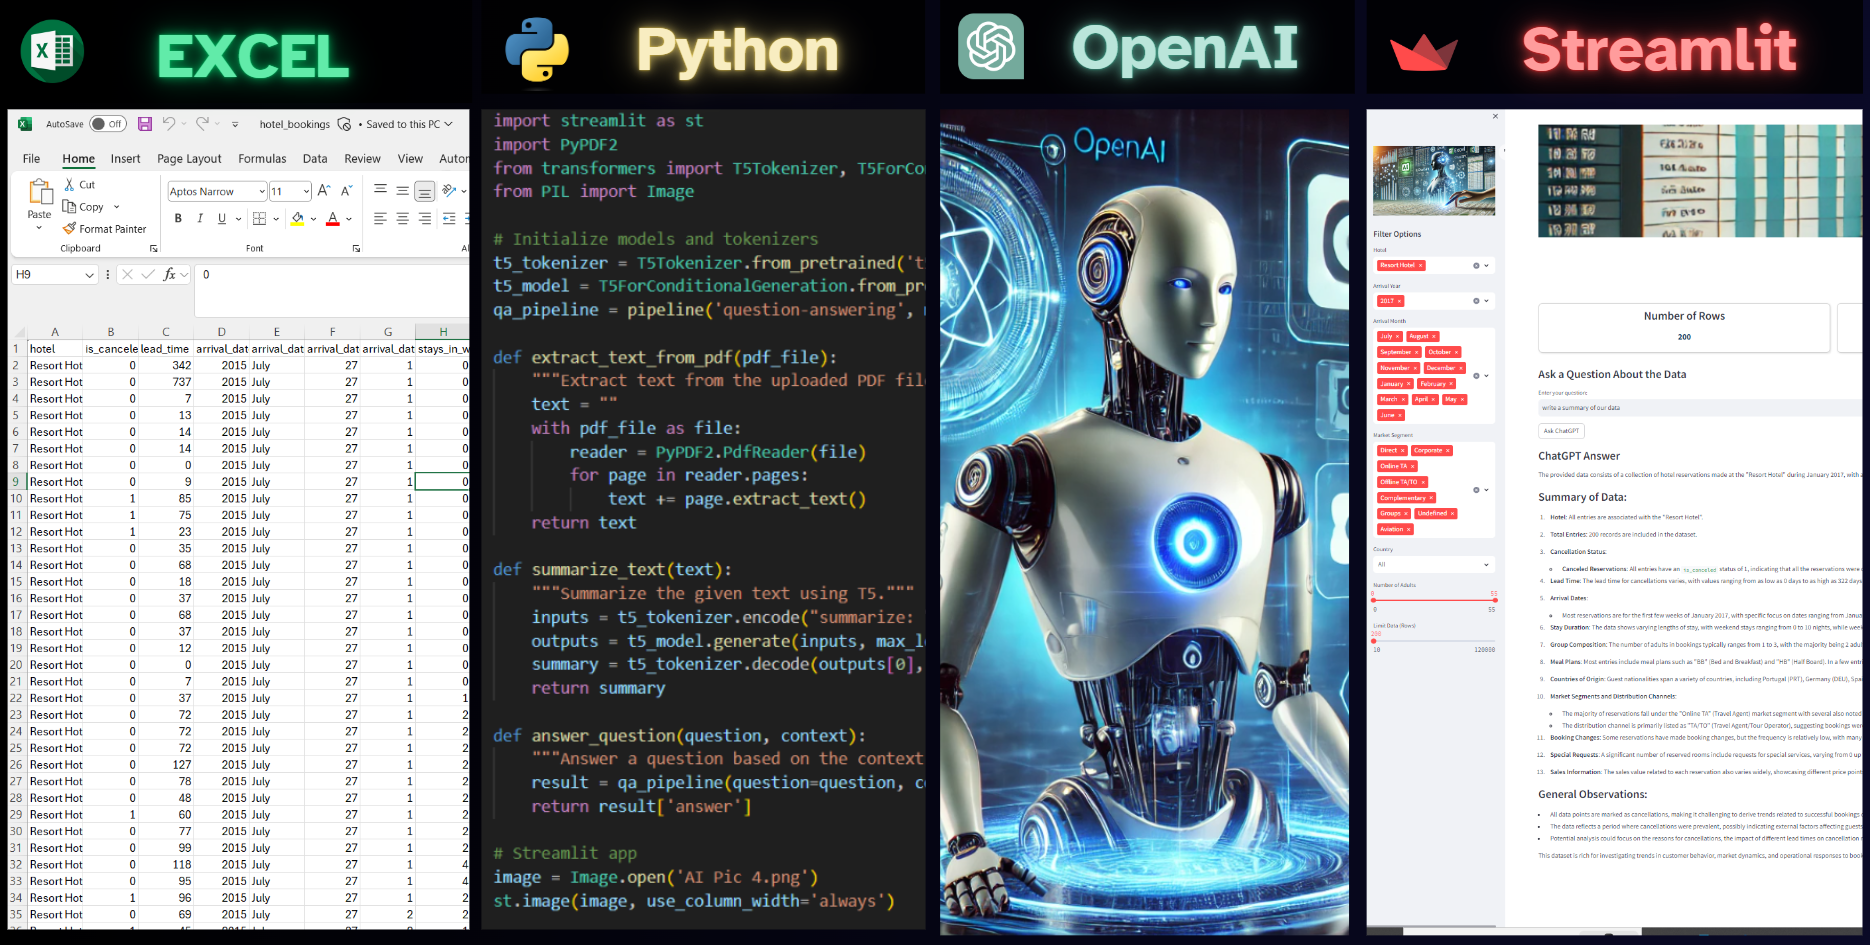

In [1]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\8. Chat GPT to Excel\\"
Image("AI Pic5.png",width=900, height=700)

## Agenda:
- Libraries we need
- Loading the Excel data
- Testing Chat GPT API 
- Testing Chat GPT API on our data
- Creating Streamlit app
- Deployng the app

## 0. Libraries we need

In [ ]:
# pip install streamlit 

In [ ]:
# pip install openai

In [9]:
import pandas as pd
import os
from openai import OpenAI


## 1. Loading the Excel data

In [11]:
# loading excel
def load_data():
    df = pd.read_excel("hotel_bookings.xlsx")
    return df

# runing function
data = load_data()

# to see your directory: os.getcwd()

print(data.shape)
data.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Sales,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Testing the Chat GPT API

In [15]:
# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

# Create an API Key: https://platform.openai.com/api-keys
# Documentation: https://github.com/openai/openai-python

def testing_queustion(question):
    """Summarizes the text using OpenAI's API."""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that summarizes text."},
            {"role": "user", "content": question}
        ],
        max_tokens=300,
        temperature=0.7
    )
    summary = response.choices[0].message.content
    return summary

testing_queustion("Write a story about BTC")

# Documentation: https://github.com/openai/openai-python
# Create API Key: https://platform.openai.com/settings/profile?tab=api-keys

'Bitcoin, often abbreviated as BTC, is a digital currency that was created in 2009 by an unknown person or group of people using the pseudonym Satoshi Nakamoto. It operates on a decentralized network called blockchain, which allows for peer-to-peer transactions without the need for a central authority like a bank. \n\nBitcoin has gained popularity over the years as a form of investment and digital payment system. Its value can be volatile, with prices fluctuating based on market demand. Despite this, many people see Bitcoin as a potential alternative to traditional currencies due to its limited supply and the security provided by blockchain technology.\n\nAs more businesses and individuals adopt Bitcoin, its use cases continue to expand. Some companies now accept Bitcoin as a form of payment, and there are even Bitcoin ATMs where users can buy and sell the digital currency. Additionally, some countries are exploring the idea of creating their own digital currencies based on the princip

## 3. Testing the Chat GPT API on Our Data

In [17]:
# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

def query_data(data_json, question, model_name):
    prompt = f"Based on the following relational data, answer the question:\n{data_json}\nQuestion: {question}"
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "you are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    return chat_completion.choices[0].message.content

# Limiting the data
limited_data = data.head(500)

# Convert DataFrame to JSON or other structured format
data_json = limited_data.to_json(orient='records')

# Define the model you want to use
#model_name = 'gpt-3.5-turbo'  # Change this to the model you want to use
model_name = 'gpt-4o-mini' 
# model pricing: https://openai.com/api/pricing/

# Question to test
question = "Summarize the text"

query_data(data_json, question, model_name)

'The data consists of multiple records regarding hotel reservations at a "Resort Hotel" for the month of July 2015. Each record contains details about a specific booking, including whether it was canceled, the lead time before check-in, arrival date, length of stay, number of adults and children, meal type, country of origin, market segment, and other specifics such as agent involvement and special requests. \n\nKey observations include:\n- There are both confirmed reservations and cancellations.\n- The majority of reservations appear to be for two adults, often with additional children.\n- Meal options vary among bookings, with "BB" (bed and breakfast) and "HB" (half board) being common.\n- Various market segments are represented, including direct bookings, online travel agencies, and corporate bookings.\n- Different countries of origin are noted, including Portugal (PRT), the United Kingdom (GBR), and several others.\n\nIn summary, the dataset offers a comprehensive overview of hotel

## 4. Bulding the Streamlit app

In [19]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
import streamlit as st
import pandas as pd
import os
from openai import OpenAI
from PIL import Image

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# Set Streamlit layout to wide and customize page background color
st.set_page_config(layout="wide")

# Load data from Excel
@st.cache_data
def load_data():
    df = pd.read_excel("hotel_bookings.xlsx")
    return df

data = load_data()

# Set CSS for custom styling (background color, card borders, etc.)
st.markdown("""
    <style>
    body {
        background-color: #ffcccb;
    }
    
    .reportview-container .main .block-container {
        background-color: #ffcccb;  /* Light pink background for the main container */
    }

    .sidebar .sidebar-content {
        background-color: #ffcccb;  /* Light pink background for the sidebar */
    }

    .custom-card {
        background-color: white;
        padding: 5px;
        border-radius: 10px;
        border: 2px solid #d3d3d3;
        box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.1);
        text-align: center;
        margin-bottom: 10px;
    }

    .custom-card h3 {
        margin-bottom: 2px;
    }

    .custom-card p {
        color: #003366;
        font-size: 20px;
        font-weight: bold;
    }

    .card-container {
        display: flex;
        justify-content: space-between;
        margin-bottom: 10px;
        gap: 10px;
    }

    .centered-title {
        text-align: center;
        font-size: 32px;
        font-weight: bold;
        margin-bottom: 20px;
    }

    .stDataFrame div[data-testid="stHorizontalBlock"] {
        width: auto !important;
        min-width: 150px !important;
    }
    </style>
    """, unsafe_allow_html=True)

# Display banner image at the top of the app with reduced height
image = Image.open('AI Pic2.png')
st.image(image, use_column_width=True, caption="Sales and AI Banner", output_format="PNG")

# Centered main title
st.markdown('<h1 class="centered-title">Hotel Bookings Data Dashboard</h1>', unsafe_allow_html=True)

# Sidebar with an image
image2 = Image.open('AI Pic1.png')
st.sidebar.image(image2, use_column_width=True)

# Sidebar with filters
st.sidebar.header("Filter Options")

# Filter options
hotel_options = data["hotel"].unique()
year_options = data["arrival_date_year"].unique()
month_options = data["arrival_date_month"].unique()  # Added month filter
market_segment_options = data["market_segment"].unique()
country_options = data["country"].dropna().unique()
adults_min = int(data["adults"].min())
adults_max = int(data["adults"].max())

# Sidebar filters
hotel_filter = st.sidebar.multiselect("Hotel", hotel_options, default=hotel_options)
year_filter = st.sidebar.multiselect("Arrival Year", year_options, default=year_options)
month_filter = st.sidebar.multiselect("Arrival Month", month_options, default=month_options)  # Added month filter
market_segment_filter = st.sidebar.multiselect("Market Segment", market_segment_options, default=market_segment_options)
country_filter = st.sidebar.selectbox("Country", ["All"] + list(country_options))  # Changed to drop-down
adults_filter = st.sidebar.slider("Number of Adults", min_value=adults_min, max_value=adults_max, value=(adults_min, adults_max))

# Data Limit filter
data_limit = st.sidebar.slider("Limit Data (Rows)", min_value=10, max_value=120000, value=200)

# Filter the data based on selections
filtered_data = data[
    (data["hotel"].isin(hotel_filter)) &
    (data["arrival_date_year"].isin(year_filter)) &
    (data["arrival_date_month"].isin(month_filter)) &  # Added month filter condition
    (data["market_segment"].isin(market_segment_filter)) &
    ((data["country"] == country_filter) if country_filter != "All" else True) &
    (data["adults"].between(adults_filter[0], adults_filter[1]))
].head(data_limit)

# Calculate Metrics
num_rows = len(filtered_data)
num_tokens = num_rows * 21 * 6 
num_countries = filtered_data['country'].nunique()
num_cancellations = filtered_data['previous_cancellations'].astype(float).sum()
total_sales = filtered_data['Sales'].sum()  

# Display cards with metrics
st.markdown('<div class="card-container">', unsafe_allow_html=True)
col1, col2, col3, col4, col5 = st.columns(5)

with col1:
    st.markdown(f'<div class="custom-card"><h3>Number of Rows</h3><p>{num_rows:,}</p></div>', unsafe_allow_html=True)

with col2:
    st.markdown(f'<div class="custom-card"><h3>Est. of Tokens</h3><p>{num_tokens:,}</p></div>', unsafe_allow_html=True)

with col3:
    st.markdown(f'<div class="custom-card"><h3>Number of Countries</h3><p>{num_countries:,}</p></div>', unsafe_allow_html=True)

with col4:
    st.markdown(f'<div class="custom-card"><h3>No. of Cancellations</h3><p>{num_cancellations:,}</p></div>', unsafe_allow_html=True)

with col5:
    st.markdown(f'<div class="custom-card"><h3>Total Sales</h3><p>${total_sales:,.2f}</p></div>', unsafe_allow_html=True)

st.markdown('</div>', unsafe_allow_html=True)

# Define the function to query OpenAI
def query_data(data_json, question, model_name):
    prompt = f"Based on the following relational data, answer the question:\n{data_json}\nQuestion: {question}"
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "you are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    return chat_completion.choices[0].message.content

# Split page layout for Question section (50%) and SQL table (50%)
col_left, col_right = st.columns(2)

# Question section on the left
with col_left:
    st.subheader("Ask a Question About the Data")
    user_question = st.text_input("Enter your question:")

    # Button to ask question
    if st.button("Ask ChatGPT"):
        if user_question:
            answer = query_data(filtered_data.to_json(orient='records'), user_question, 'gpt-4o-mini')
            st.subheader("ChatGPT Answer")
            st.write(answer)
        else:
            st.warning("Please enter a question.")

# SQL table section on the right
with col_right:
    st.subheader("Filtered Hotel Bookings Data")
    st.dataframe(filtered_data)

# Streamlit run Excel_ChatGPT.py